In [1]:
import scipy.io as sio
from matplotlib import pyplot as plt 
%matplotlib inline
import numpy as np 
import os 

import mne
import numpy as np
import scipy.io as sio
 

In [2]:
# coding: utf-8

def _loadftfile(path):

    filecontents = sio.whosmat(path)
    
    strucname = filecontents[0][0]

    mat = sio.loadmat(path, squeeze_me=True, struct_as_record=False)
    matstruct = mat[strucname]
    return matstruct 


def _matstruc2mne(matstruct,ch_names=None):
    
    if ch_names is None:
        ch_names=list(matstruct.label)
        
    myinfo = mne.create_info(ch_names=ch_names,sfreq=1/(matstruct.time[1] - matstruct.time[0]),ch_types='eeg')
    ev_arr = mne.EvokedArray(matstruct.individual.mean(axis=0),myinfo,tmin=-0.2) ### Specific to this dataset, 200ms baseline
    ev_arr.set_montage(mne.channels.read_montage("EGI_256"))
    return ev_arr


def _matstruc2latency(matstruct,peak_tmin,peak_tmax,ch_names=None):
    
    if ch_names is None:
        ch_names=list(matstruct.label)
        
    myinfo = mne.create_info(ch_names=ch_names,sfreq=1/(matstruct.time[1] - matstruct.time[0]),ch_types='eeg')
    
    all_chpeaks = []
    all_lat = []
    all_amp = []
    for mat in matstruct.individual:
    
        ev_arr = mne.EvokedArray(mat,myinfo,tmin=-0.2) ### Specific to this dataset, 200ms baseline
        ev_arr.set_montage(mne.channels.read_montage("EGI_256"))
        chpeak,lat,amp = ev_arr.get_peak(tmin=peak_tmin,tmax=peak_tmax,return_amplitude=True,mode='neg')
        all_lat.append(lat)
        all_chpeaks.append(chpeak)
        all_amp.append(amp)
    return all_chpeaks,all_lat,all_amp


def _matstruc2mne_epochs(matstruct,ch_names=None):
    
    if ch_names is None:
        ch_names=list(matstruct.label)
        
    myinfo = mne.create_info(ch_names=ch_names,sfreq=1/(matstruct.time[1] - matstruct.time[0]),ch_types='eeg')
    ev_arr = mne.EpochsArray(matstruct.individual,myinfo,tmin=-0.2) ### Specific to this dataset, 200ms baseline
    ev_arr.set_montage(mne.channels.read_montage("EGI_256"))
    return ev_arr

In [3]:
tcrop = 0.7

In [5]:
matfile = '/home/nfarrugi/datasets/eeg4sounds/result-eeg4sounds/oddball/grav/grav_bin_dev.mat'

mat_bin_dev = _loadftfile(matfile)

matfile = '/home/nfarrugi/datasets/eeg4sounds/result-eeg4sounds/oddball/grav/grav_bin_std.mat'

mat_bin_std = _loadftfile(matfile)



matfile = '/home/nfarrugi/datasets/eeg4sounds/result-eeg4sounds/oddball/grav/grav_ste_dev.mat'

mat_ste_dev = _loadftfile(matfile)

matfile = '/home/nfarrugi/datasets/eeg4sounds/result-eeg4sounds/oddball/grav/grav_ste_std.mat'

mat_ste_std = _loadftfile(matfile)


In [6]:
ev_bin_dev = _matstruc2mne(mat_bin_dev).crop(tmax=tcrop)
ev_bin_std = _matstruc2mne(mat_bin_std).crop(tmax=tcrop)

ev_ste_dev = _matstruc2mne(mat_ste_dev).crop(tmax=tcrop)
ev_ste_std = _matstruc2mne(mat_ste_std).crop(tmax=tcrop)

mne.equalize_channels([ev_bin_dev,ev_ste_dev,ev_bin_std,ev_ste_std])

Identifying common channels ...
Dropped the following channels:
['E73', 'E144', 'E9', 'E211', 'E201', 'E64', 'E203', 'E49', 'E63', 'E245', 'E158', 'E75', 'E251', 'E168', 'E227', 'E169', 'E160', 'E150', 'E183', 'E253', 'E59', 'E179', 'E35', 'E192', 'E12', 'E238', 'E213', 'E177', 'E256', 'E125', 'E29', 'E138', 'E34', 'E47', 'E248', 'E53', 'E231']


In [6]:
epochs_bin_dev = _matstruc2mne_epochs(mat_bin_dev).crop(tmax=tcrop)
epochs_bin_std = _matstruc2mne_epochs(mat_bin_std).crop(tmax=tcrop)

epochs_ste_dev = _matstruc2mne_epochs(mat_ste_dev).crop(tmax=tcrop)
epochs_ste_std = _matstruc2mne_epochs(mat_ste_std).crop(tmax=tcrop)

mne.equalize_channels([epochs_bin_dev,epochs_bin_std,epochs_ste_dev,epochs_ste_std])

19 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
tmax is not in epochs time interval. tmax is set to epochs.tmax
19 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
tmax is not in epochs time interval. tmax is set to epochs.tmax
19 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
tmax is not in epochs time interval. tmax is set to epochs.tmax


<ipython-input-6-43cba28dbd19>:1: RuntimeWarning: tmax is not in epochs time interval. tmax is set to epochs.tmax
  epochs_bin_dev = _matstruc2mne_epochs(mat_bin_dev).crop(tmax=tcrop)
<ipython-input-6-43cba28dbd19>:2: RuntimeWarning: tmax is not in epochs time interval. tmax is set to epochs.tmax
  epochs_bin_std = _matstruc2mne_epochs(mat_bin_std).crop(tmax=tcrop)
<ipython-input-6-43cba28dbd19>:4: RuntimeWarning: tmax is not in epochs time interval. tmax is set to epochs.tmax
  epochs_ste_dev = _matstruc2mne_epochs(mat_ste_dev).crop(tmax=tcrop)


19 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
tmax is not in epochs time interval. tmax is set to epochs.tmax
Identifying common channels ...
Dropped the following channels:
['E201', 'E245', 'E231', 'E211', 'E144', 'E73', 'E47', 'E251', 'E34', 'E192', 'E59', 'E213', 'E160', 'E138', 'E248', 'E12', 'E256', 'E168', 'E169', 'E35', 'E150', 'E9', 'E64', 'E49', 'E53', 'E158', 'E29', 'E227', 'E63', 'E183', 'E177', 'E125', 'E75', 'E238', 'E253', 'E179', 'E203']


<ipython-input-6-43cba28dbd19>:5: RuntimeWarning: tmax is not in epochs time interval. tmax is set to epochs.tmax
  epochs_ste_std = _matstruc2mne_epochs(mat_ste_std).crop(tmax=tcrop)


Latency analysis
--

In [7]:
peak_tmin = 0.30
peak_tmax = 0.35
ch_lat_bin_dev,lat_bin_dev,amp_bin_dev = _matstruc2latency(mat_bin_dev,peak_tmin=peak_tmin,peak_tmax=peak_tmax)
#ev_bin_std = _matstruc2latency(mat_bin_std)

ch_lat_ste_dev,lat_ste_dev,amp_ste_dev = _matstruc2latency(mat_ste_dev,peak_tmin=peak_tmin,peak_tmax=peak_tmax)
#ev_ste_std = _matstruc2latency(mat_ste_std)

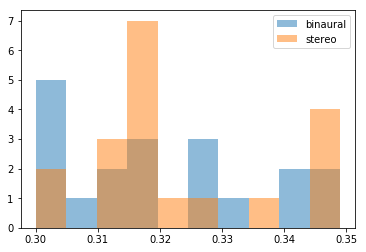

In [9]:
plt.hist(lat_bin_dev,alpha=0.5)
plt.hist(lat_ste_dev,alpha=0.5)
plt.legend(['binaural','stereo'])

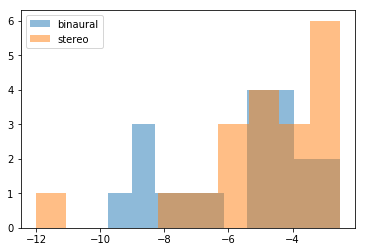

In [10]:
plt.hist(amp_bin_dev,alpha=0.5)
plt.hist(amp_ste_dev,alpha=0.5)
plt.legend(['binaural','stereo'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f65601a5a58>,
 'caps': [<matplotlib.lines.Line2D at 0x7f65601ad320>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f65601a5908>,
 'medians': [<matplotlib.lines.Line2D at 0x7f65601adb70>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f65601adf98>,
 'means': []}

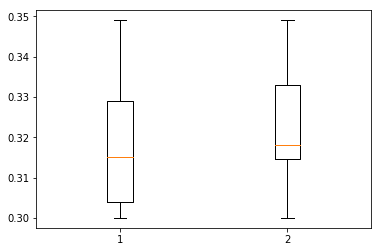

In [11]:
plt.boxplot([lat_bin_dev,lat_ste_dev])

Cluster tests
--

In [7]:
T_obs_bin,clusters_bin,clusters_pb_bin,H0_bin = mne.stats.spatio_temporal_cluster_test(X_bin,threshold=None,n_permutations=1000,out_type='mask')

NameError: name 'X_bin' is not defined

In [91]:
T_obs_ste,clusters_ste,clusters_pb_ste,H0_ste = mne.stats.spatio_temporal_cluster_test(X_ste,threshold=None,n_permutations=1000,out_type='mask')

Using a threshold of 21.093024
stat_fun(H1): min=0.000000 max=31.585274
Running initial clustering
Found 18 clusters
Permuting 999 times...
[....................................... ] 99.30%  \   Computing cluster p-values
Done.


In [92]:
T_obs_dev,clusters_dev,clusters_pb_dev,H0_dev = mne.stats.spatio_temporal_cluster_test(X_dev,threshold=12,n_permutations=1000,out_type='mask')

stat_fun(H1): min=0.000000 max=14.638737
Running initial clustering
Found 3 clusters
Permuting 999 times...
[....................................... ] 99.30%  \   Computing cluster p-values
Done.


In [93]:
T_obs_stan,clusters_stan,clusters_pb_stan,H0_stan = mne.stats.spatio_temporal_cluster_test(X_stan,threshold=None,n_permutations=1000,out_type='mask')

Using a threshold of 21.093024
stat_fun(H1): min=0.000000 max=9.579573
Running initial clustering
Found 0 clusters
No clusters found, returning empty H0, clusters, and cluster_pv


<ipython-input-93-ddeda34da736>:1: RuntimeWarning: No clusters found, returning empty H0, clusters, and cluster_pv
  T_obs_stan,clusters_stan,clusters_pb_stan,H0_stan = mne.stats.spatio_temporal_cluster_test(X_stan,threshold=None,n_permutations=1000,out_type='mask')


time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-109-7b40f5617e24>:4: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_joint(title="Deviants Binaural vs. Stereo")#, ts_args=time_unit,topomap_args=time_unit)  # show difference wave


time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-109-7b40f5617e24>:4: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_joint(title="Deviants Binaural vs. Stereo")#, ts_args=time_unit,topomap_args=time_unit)  # show difference wave


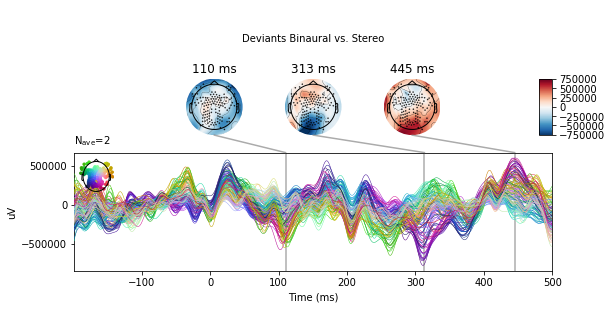

In [109]:
evoked = mne.combine_evoked([ev_bin_dev, -ev_ste_dev],
                            weights='equal')  # calculate difference wave
time_unit = dict(time_unit="ms")
evoked.plot_joint(title="Deviants Binaural vs. Stereo")#, ts_args=time_unit,topomap_args=time_unit)  # show difference wave
plt.show()

for clust,pval in zip(clusters_dev,clusters_pb_dev):
    if pval < 0.1:
        evoked.plot_image(mask=clust.T,mask_style='contour')
        plt.show()

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-106-f3698ca74301>:4: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_joint(title="Binaural Deviant vs. Std")#, ts_args=time_unit,topomap_args=time_unit)  # show difference wave


time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-106-f3698ca74301>:4: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_joint(title="Binaural Deviant vs. Std")#, ts_args=time_unit,topomap_args=time_unit)  # show difference wave


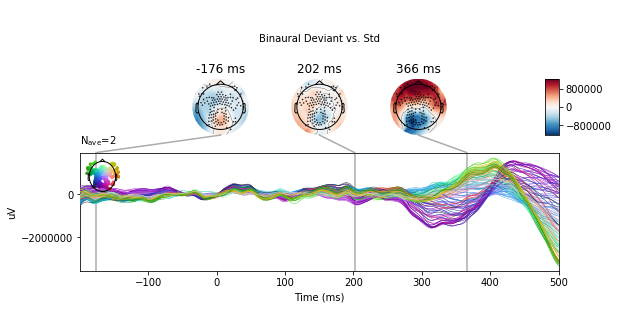

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-106-f3698ca74301>:9: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T,mask_style='contour')


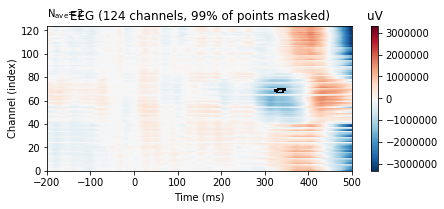

51
time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-106-f3698ca74301>:9: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T,mask_style='contour')


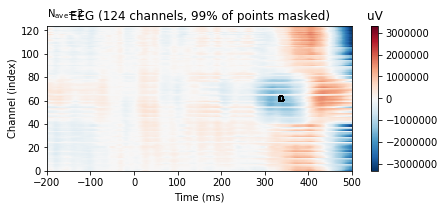

33
time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-106-f3698ca74301>:9: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T,mask_style='contour')


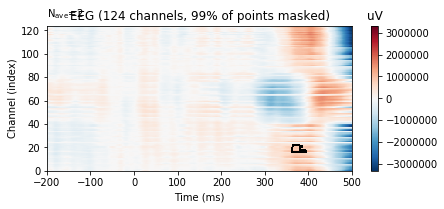

137
time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-106-f3698ca74301>:9: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T,mask_style='contour')


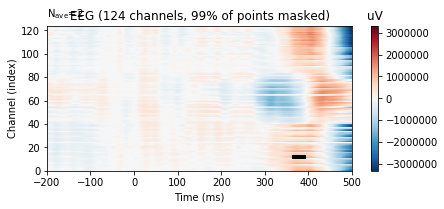

56
time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-106-f3698ca74301>:9: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T,mask_style='contour')


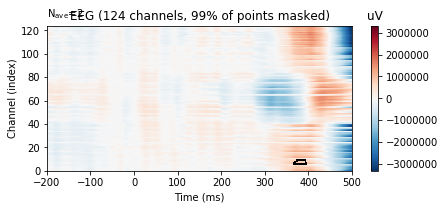

74
time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-106-f3698ca74301>:9: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T,mask_style='contour')


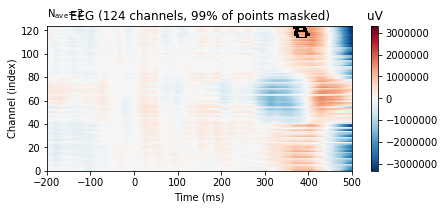

187
time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-106-f3698ca74301>:9: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T,mask_style='contour')


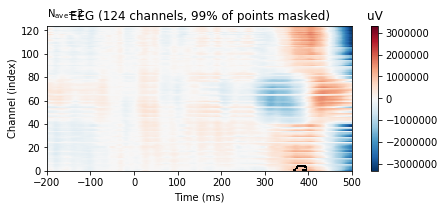

84
time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-106-f3698ca74301>:9: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T,mask_style='contour')


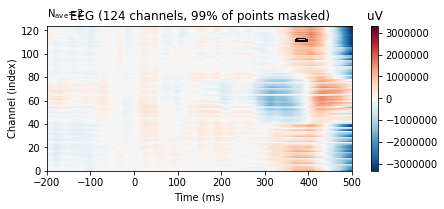

45
time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-106-f3698ca74301>:9: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T,mask_style='contour')


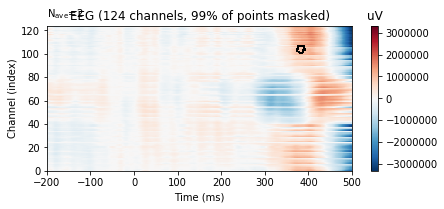

82
time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-106-f3698ca74301>:9: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T,mask_style='contour')


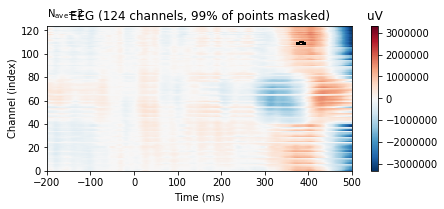

29
time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-106-f3698ca74301>:9: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T,mask_style='contour')


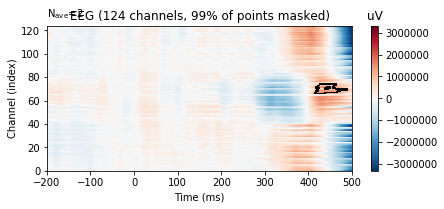

333
time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-106-f3698ca74301>:9: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T,mask_style='contour')


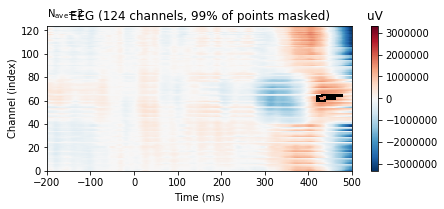

170
time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-106-f3698ca74301>:9: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T,mask_style='contour')


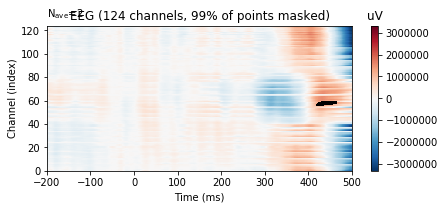

78
time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-106-f3698ca74301>:9: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T,mask_style='contour')


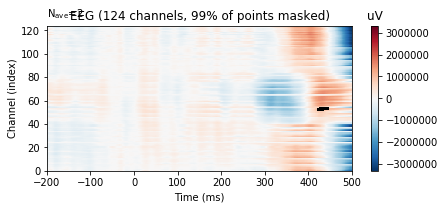

33
time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-106-f3698ca74301>:9: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T,mask_style='contour')


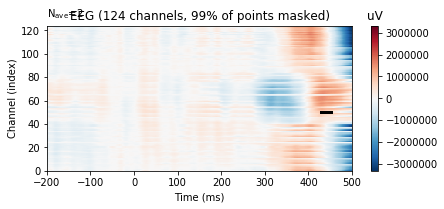

27
time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-106-f3698ca74301>:9: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T,mask_style='contour')


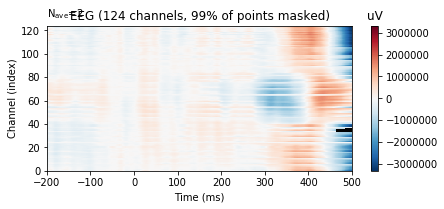

48
time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-106-f3698ca74301>:9: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T,mask_style='contour')


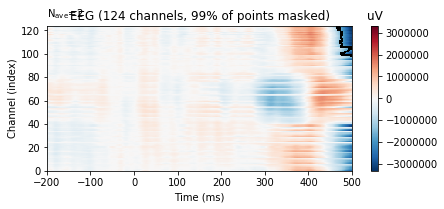

570
time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-106-f3698ca74301>:9: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T,mask_style='contour')


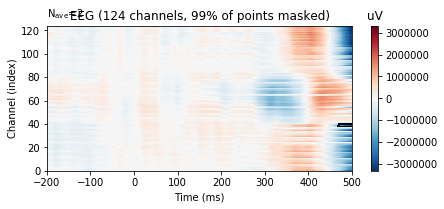

62
time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-106-f3698ca74301>:9: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T,mask_style='contour')


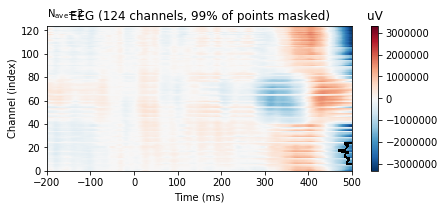

255
time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-106-f3698ca74301>:9: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T,mask_style='contour')


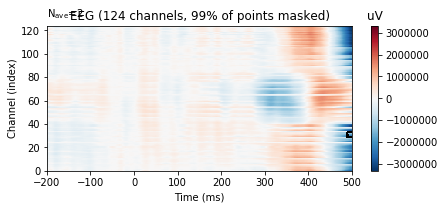

43
time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-106-f3698ca74301>:9: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T,mask_style='contour')


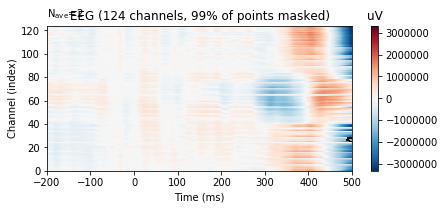

26
time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-106-f3698ca74301>:9: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T,mask_style='contour')


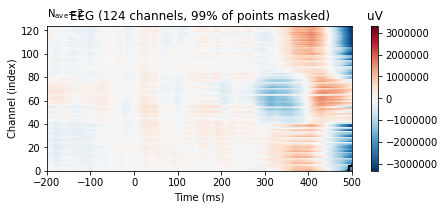

32


In [106]:
evoked = mne.combine_evoked([ev_bin_dev, -ev_bin_std],
                            weights='equal')  # calculate difference wave
time_unit = dict(time_unit="ms")
evoked.plot_joint(title="Binaural Deviant vs. Std")#, ts_args=time_unit,topomap_args=time_unit)  # show difference wave
plt.show()

for clust,pval in zip(clusters_bin,clusters_pb_bin):
    if pval < 0.005:
        evoked.plot_image(mask=clust.T,mask_style='contour')
        plt.show()
        clustersize = np.sum(clust)
        print(clustersize)

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-108-18691b785d77>:4: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_joint(title="Stereo Deviant vs. Std")#, ts_args=time_unit,topomap_args=time_unit)  # show difference wave


time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-108-18691b785d77>:4: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_joint(title="Stereo Deviant vs. Std")#, ts_args=time_unit,topomap_args=time_unit)  # show difference wave


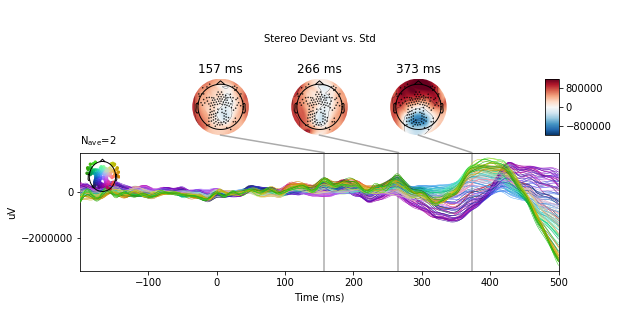

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-108-18691b785d77>:9: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T,mask_style='contour')


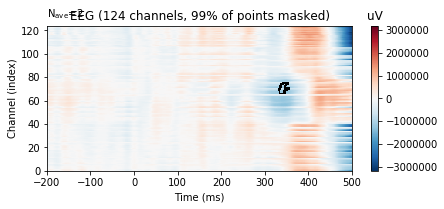

118
time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-108-18691b785d77>:9: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T,mask_style='contour')


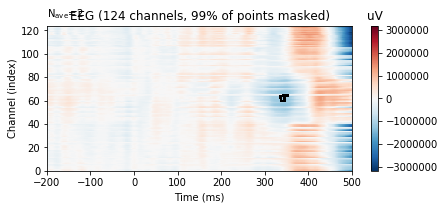

47
time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-108-18691b785d77>:9: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T,mask_style='contour')


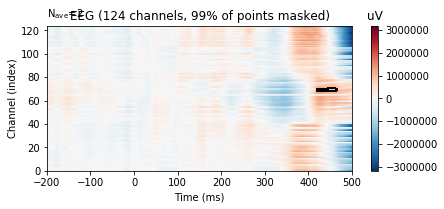

107
time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-108-18691b785d77>:9: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_image(mask=clust.T,mask_style='contour')


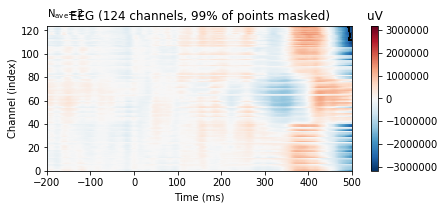

80


In [108]:
evoked = mne.combine_evoked([ev_ste_dev, -ev_ste_std],
                            weights='equal')  # calculate difference wave

evoked.plot_joint(title="Stereo Deviant vs. Std")#, ts_args=time_unit,topomap_args=time_unit)  # show difference wave
plt.show()

for clust,pval in zip(clusters_ste,clusters_pb_ste):
    if pval < 0.005:
        evoked.plot_image(mask=clust.T,mask_style='contour')
        plt.show()
        clustersize = np.sum(clust)
        print(clustersize)

extraire les electrodes (max) et timepoints across tous les clusters. 
On se restreint à 300-400ms. 

In [295]:
def extract_electrodes_times(clusters,clusters_pb,tmin_ind=500,tmax_ind=640,alpha=0.005):

    ch_list_temp = []
    time_list_temp = []

    for clust,pval in zip(clusters,clusters_pb):
        if pval < alpha:

            for j,curline in enumerate(clust[tmin_ind:tmax_ind]):

                for k,el in enumerate(curline):
                    if el:                    
                        ch_list_temp.append(evoked.ch_names[k])
                        time_list_temp.append(evoked.times[j+tmin_ind])

    return np.unique(ch_list_temp),np.unique(time_list_temp)

In [296]:
channels_deviance_ste,times_deviance_ste=extract_electrodes_times(clusters_ste,clusters_pb_ste)

In [297]:
channels_deviance_bin,times_deviance_bin=extract_electrodes_times(clusters_bin,clusters_pb_bin)

In [300]:
print(channels_deviance_bin),print(times_deviance_bin)

['E108' 'E109' 'E110' 'E117' 'E118' 'E126' 'E127' 'E13' 'E131' 'E139'
 'E14' 'E140' 'E141' 'E142' 'E143' 'E15' 'E151' 'E152' 'E153' 'E2' 'E20'
 'E21' 'E220' 'E221' 'E222' 'E223' 'E224' 'E225' 'E234' 'E235' 'E239'
 'E240' 'E241' 'E243' 'E244' 'E247' 'E249' 'E250' 'E252' 'E27' 'E28' 'E30'
 'E36' 'E4' 'E40' 'E41' 'E5' 'E6' 'E98' 'E99']
[0.325 0.326 0.327 0.328 0.329 0.33  0.331 0.332 0.333 0.334 0.335 0.336
 0.337 0.338 0.339 0.34  0.341 0.342 0.343 0.344 0.345 0.346 0.347 0.348
 0.364 0.365 0.366 0.367 0.368 0.369 0.37  0.371 0.372 0.373 0.374 0.375
 0.376 0.377 0.378 0.379 0.38  0.381 0.382 0.383 0.384 0.385 0.386 0.387
 0.388 0.389 0.39  0.391 0.392 0.393 0.394 0.395 0.396 0.397 0.398 0.399
 0.4   0.401 0.417 0.418 0.419 0.42  0.421 0.422 0.423 0.424 0.425 0.426
 0.427 0.428 0.429 0.43  0.431 0.432 0.433 0.434 0.435 0.436 0.437 0.438
 0.439 0.44 ]


(None, None)

In [301]:
print(channels_deviance_ste),print(times_deviance_ste)

['E117' 'E118' 'E126' 'E127' 'E131' 'E139' 'E140' 'E141' 'E142' 'E143'
 'E151' 'E152' 'E153' 'E154']
[0.334 0.335 0.336 0.337 0.338 0.339 0.34  0.341 0.342 0.343 0.344 0.345
 0.346 0.347 0.348 0.349 0.35  0.351 0.352 0.353 0.354 0.355 0.356 0.421
 0.422 0.423 0.424 0.425 0.426 0.427 0.428 0.429 0.43  0.431 0.432 0.433
 0.434 0.435 0.436 0.437 0.438 0.439 0.44 ]


(None, None)

In [314]:
np.intersect1d(times_deviance_bin,times_deviance_ste)

array([0.334, 0.335, 0.336, 0.337, 0.338, 0.339, 0.34 , 0.341, 0.342,
       0.343, 0.344, 0.345, 0.346, 0.347, 0.348, 0.421, 0.422, 0.423,
       0.424, 0.425, 0.426, 0.427, 0.428, 0.429, 0.43 , 0.431, 0.432,
       0.433, 0.434, 0.435, 0.436, 0.437, 0.438, 0.439, 0.44 ])

In [316]:
times_union = np.union1d(times_deviance_bin,times_deviance_ste)

In [324]:
ch_union = np.unique(np.hstack([channels_deviance_bin,channels_deviance_ste]))

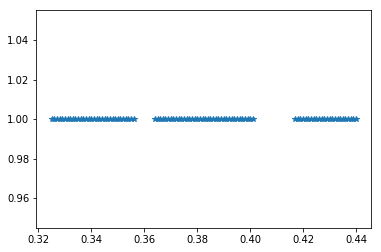

In [326]:
plt.plot(times_union,np.ones_like(times_union),'*')


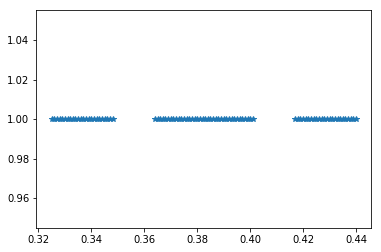

In [346]:
plt.plot(times_deviance_bin,np.ones_like(times_deviance_bin),'*')

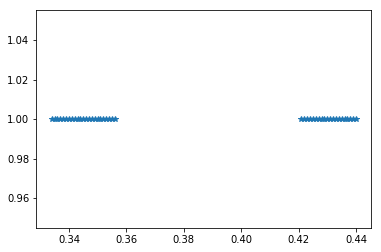

In [347]:
plt.plot(times_deviance_ste,np.ones_like(times_deviance_ste),'*')

Isolons les trois périodes

In [343]:
t1 = times_union[:32]
print(t1)

[0.325 0.326 0.327 0.328 0.329 0.33  0.331 0.332 0.333 0.334 0.335 0.336
 0.337 0.338 0.339 0.34  0.341 0.342 0.343 0.344 0.345 0.346 0.347 0.348
 0.349 0.35  0.351 0.352 0.353 0.354 0.355 0.356]


In [344]:
t2 = times_union[32:70]
print(t2)

[0.364 0.365 0.366 0.367 0.368 0.369 0.37  0.371 0.372 0.373 0.374 0.375
 0.376 0.377 0.378 0.379 0.38  0.381 0.382 0.383 0.384 0.385 0.386 0.387
 0.388 0.389 0.39  0.391 0.392 0.393 0.394 0.395 0.396 0.397 0.398 0.399
 0.4   0.401]


In [345]:
t3 = times_union[71:]
print(t3)

[0.418 0.419 0.42  0.421 0.422 0.423 0.424 0.425 0.426 0.427 0.428 0.429
 0.43  0.431 0.432 0.433 0.434 0.435 0.436 0.437 0.438 0.439 0.44 ]


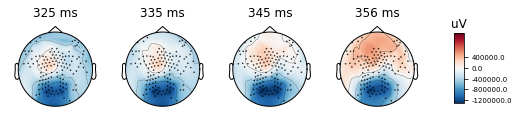

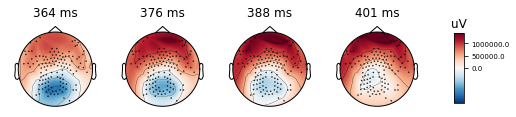

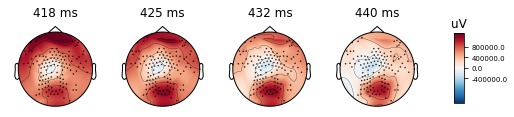

In [362]:
evoked_diff_ste = mne.combine_evoked([ev_ste_dev, -ev_ste_std],weights='equal').crop(t1[0],t1[-1])

evoked_diff_ste.plot_topomap(time_unit='ms')
plt.show()


evoked_diff_ste = mne.combine_evoked([ev_ste_dev, -ev_ste_std],weights='equal').crop(t2[0],t2[-1])

evoked_diff_ste.plot_topomap(time_unit='ms')
plt.show()

evoked_diff_ste = mne.combine_evoked([ev_ste_dev, -ev_ste_std],weights='equal').crop(t3[0],t3[-1])

evoked_diff_ste.plot_topomap(time_unit='ms')
plt.show()



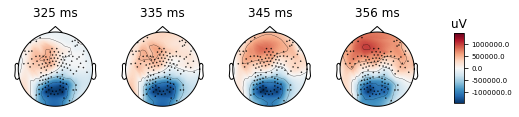

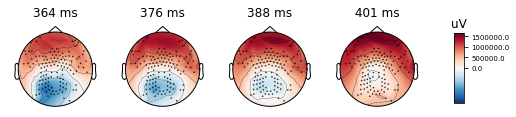

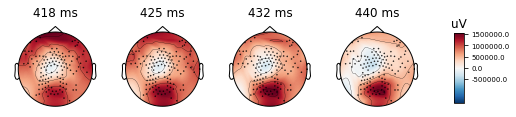

In [363]:
evoked_diff_bin = mne.combine_evoked([ev_bin_dev, -ev_bin_std],weights='equal').crop(t1[0],t1[-1])

evoked_diff_bin.plot_topomap(time_unit='ms')
plt.show()


evoked_diff_bin = mne.combine_evoked([ev_bin_dev, -ev_bin_std],weights='equal').crop(t2[0],t2[-1])

evoked_diff_bin.plot_topomap(time_unit='ms')
plt.show()

evoked_diff_bin = mne.combine_evoked([ev_bin_dev, -ev_bin_std],weights='equal').crop(t3[0],t3[-1])

evoked_diff_bin.plot_topomap(time_unit='ms')
plt.show()



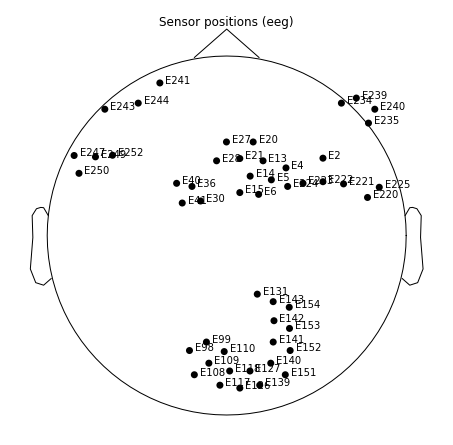

In [449]:
epochs_bin_dev.plot_sensors(show_names=True)
plt.show()

One sample ttest FDR corrected 
--

In [12]:
#Selecting channels 
epochs_bin_dev_ch = epochs_bin_dev.pick_channels(ch_union)
epochs_bin_std_ch = epochs_bin_std.pick_channels(ch_union)
epochs_ste_dev_ch = epochs_ste_dev.pick_channels(ch_union)
epochs_ste_std_ch = epochs_ste_std.pick_channels(ch_union)

X_diff = [epochs_bin_dev_ch.get_data().transpose(0, 2, 1) - epochs_bin_std_ch.get_data().transpose(0, 2, 1),
     epochs_ste_dev_ch.get_data().transpose(0, 2, 1) - epochs_ste_std_ch.get_data().transpose(0, 2, 1)]

t1_ind = evoked.time_as_index(t1)
t2_ind = evoked.time_as_index(t2)
t3_ind = evoked.time_as_index(t3)

X_diff_ste_bin = X_diff[1]-X_diff[0]

NameError: name 'epochs_bin_dev' is not defined

In [9]:
from scipy import stats
from mne.stats import bonferroni_correction,fdr_correction

def ttest_amplitude(X,times_ind,ch_names,times):

    # Selecting time points  and averaging over time 
    amps = X[:,times_ind,:].mean(axis=1)
    
    T, pval = ttest_1samp(amps, 0)
    alpha = 0.05

    n_samples, n_tests= amps.shape
    threshold_uncorrected = stats.t.ppf(1.0 - alpha, n_samples - 1)

    reject_bonferroni, pval_bonferroni = bonferroni_correction(pval, alpha=alpha)
    threshold_bonferroni = stats.t.ppf(1.0 - alpha / n_tests, n_samples - 1)

    reject_fdr, pval_fdr = fdr_correction(pval, alpha=alpha, method='indep')
    
    mask_fdr = pval_fdr < 0.05
    mask_bonf = pval_bonferroni < 0.05

    print('FDR from %02f to %02f' % ((times[times_ind[0]]),times[times_ind[-1]]))
    for i,curi in enumerate(mask_fdr):
        if curi:
            print("Channel %s, T = %0.2f, p = %0.3f " % (ch_names[i], T[i],pval_fdr[i]))
    
    
    print('Bonferonni from %02f to %02f' % ((times[times_ind[0]]),times[times_ind[-1]]))
    for i,curi in enumerate(mask_bonf):
        if curi:
            print("Channel %s, T = %0.2f, p = %0.3f " % (ch_names[i], T[i],pval_bonferroni[i]))
    
    
    
    return T,pval,pval_fdr,pval_bonferroni

In [463]:
T,pval,pval_fdr,pval_bonferroni = ttest_amplitude(X_diff_ste_bin,t1_ind,epochs_bin_dev_ch.ch_names,times=epochs_bin_dev_ch.times)

FDR from 0.324000 to 0.355000
Channel E4, T = -3.65, p = 0.013 
Channel E5, T = -3.39, p = 0.019 
Channel E6, T = -2.91, p = 0.028 
Channel E13, T = -4.11, p = 0.013 
Channel E14, T = -3.74, p = 0.013 
Channel E15, T = -3.19, p = 0.026 
Channel E20, T = -4.05, p = 0.013 
Channel E21, T = -4.63, p = 0.011 
Channel E27, T = -3.79, p = 0.013 
Channel E28, T = -3.93, p = 0.013 
Channel E36, T = -2.97, p = 0.028 
Channel E40, T = -2.64, p = 0.044 
Channel E223, T = -2.98, p = 0.028 
Channel E224, T = -2.57, p = 0.047 
Channel E240, T = -2.62, p = 0.044 
Channel E241, T = -2.93, p = 0.028 
Channel E244, T = -3.03, p = 0.028 
Channel E247, T = -2.89, p = 0.028 
Channel E249, T = -3.00, p = 0.028 
Channel E250, T = -2.94, p = 0.028 
Channel E252, T = -3.39, p = 0.019 
Bonferonni from 0.324000 to 0.355000
Channel E13, T = -4.11, p = 0.034 
Channel E20, T = -4.05, p = 0.038 
Channel E21, T = -4.63, p = 0.011 


In [464]:
T,pval,pval_fdr,pval_bonferroni = ttest_amplitude(X_diff_ste_bin,t2_ind,epochs_bin_dev_ch.ch_names,times=epochs_bin_dev_ch.times)

FDR from 0.363000 to 0.400000
Bonferonni from 0.363000 to 0.400000


In [465]:
T,pval,pval_fdr,pval_bonferroni = ttest_amplitude(X_diff_ste_bin,t3_ind,epochs_bin_dev_ch.ch_names,times=epochs_bin_dev_ch.times)

FDR from 0.417000 to 0.439000
Bonferonni from 0.417000 to 0.439000


In [466]:
from scipy import stats
from mne.stats import bonferroni_correction,fdr_correction
T, pval = ttest_1samp(X_diff_ste_bin, 0)
alpha = 0.05

n_samples, n_tests,_ = X_diff_ste_bin.shape
threshold_uncorrected = stats.t.ppf(1.0 - alpha, n_samples - 1)

reject_bonferroni, pval_bonferroni = bonferroni_correction(pval, alpha=alpha)
threshold_bonferroni = stats.t.ppf(1.0 - alpha / n_tests, n_samples - 1)

reject_fdr, pval_fdr = fdr_correction(pval, alpha=alpha, method='indep')
#threshold_fdr = np.min(np.abs(T)[reject_fdr])

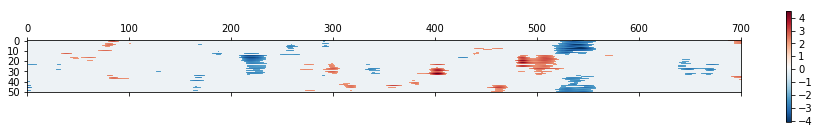

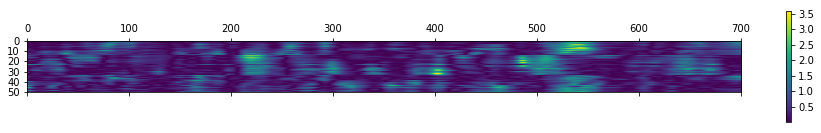

In [467]:
masking_mat = pval<0.05

Tbis = np.zeros_like(T)
Tbis[masking_mat] = T[masking_mat]


plt.matshow(Tbis.T,cmap=plt.cm.RdBu_r)
plt.colorbar()
plt.show()

plt.matshow(-np.log10(pval).T)
plt.colorbar()